Connexion drive

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
#Importation des packages
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import seaborn as sns

# Clustering sur les villes quantitatives

Importation des données avec les quantités par type d'offres culturelles

In [154]:
df = pd.read_csv('/content/drive/MyDrive/PIP - G6/Données issue BD/classif_ville_quant.csv')

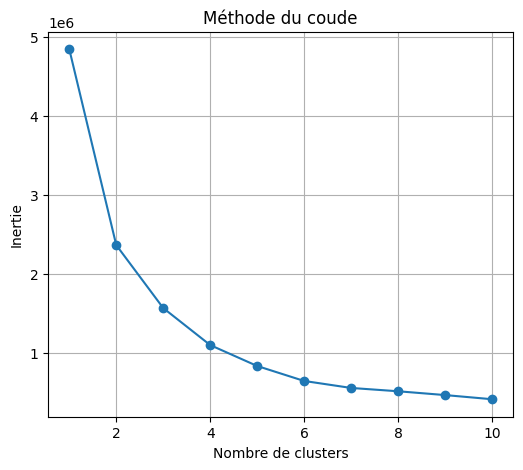

In [155]:
# suppression des colonnes non numériques
data = df.drop(columns=['CP','nomcom'])
# Standardiser les données
scaler = StandardScaler()
X = scaler.fit_transform(data)

#Méthode du coude pour le choix du nombre de clusters
inertie = []
K = range(1, 11)  #de 1 à 10 clusters

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++') #choix de la méthode de k-means++
  kmeans.fit(data)
  inertie.append(kmeans.inertia_)

#courbe de l'inertie
plt.figure(figsize=(6, 5))
plt.plot(K, inertie, marker='o')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()


In [156]:
#choix du nb de clusters
nb_cluster = 5
kmeans = KMeans(n_clusters=nb_cluster, random_state=42, init='k-means++')
kmeans.fit(data)

#ajouter les cluster au df
df['Cluster'] = kmeans.labels_

# Calcul de métriques :


silhouette score  : métrique qui évalue la qualité d'un clustering : compris entre -1 et 1. Plus le score est proche de 1, mieux c'est.

In [157]:
silhouette = silhouette_score(X, kmeans.labels_)
silhouette

0.11157459325911724

Calinski_harabasz évalue le rapport entre la variance
inter-cluster (distance entre les barycentres des clusters) et la variance intra-cluster (dispersion des points dans un cluster) et la métrique davies_bouldin évalue la moyenne des rapports entre la dispersion intra-cluster et la distance inter-cluster pour tous les clusters.

In [158]:
calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)
print(calinski_harabasz)
davies_bouldin = davies_bouldin_score(X, kmeans.labels_)
davies_bouldin

2824.0377531137683


2.38326661883725

Plus la métrique Calinski_harabasz est haute plus le clustering est bien réalisé, en comparaison, la métrique davies_bouldin elle doit être la plus proche de 0.

Nous pouvons donc dire que le clustering est très mauvaises qualité.

# Clustering sur les villes qualitatives

Données sur la présence ou non des types

In [176]:
df = pd.read_csv('/content/drive/MyDrive/PIP - G6/Données issue BD/classif_ville.csv')

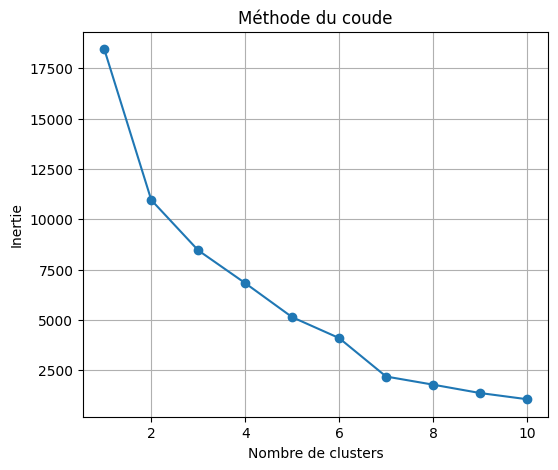

In [178]:
# suppression des colonnes non numériques
data = df.drop(columns=['CP','nomcom'])
# Standardiser les données
scaler = StandardScaler()
X = scaler.fit_transform(data)

#Méthode du coude pour le choix du nombre de clusters
inertie = []
K = range(1, 11)  #de 1 à 10 clusters

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++') #choix de la méthode de k-means++
  kmeans.fit(data)
  inertie.append(kmeans.inertia_)

#courbe de l'inertie
plt.figure(figsize=(6, 5))
plt.plot(K, inertie, marker='o')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()


In [179]:
#choix du nb de clusters
nb_cluster = 7
kmeans = KMeans(n_clusters=nb_cluster, random_state=42, init='k-means++')
kmeans.fit(data)

#ajouter les cluster au df
df['Cluster'] = kmeans.labels_

In [180]:
silhouette = silhouette_score(X, kmeans.labels_)
silhouette

0.8581693655729566

In [181]:
calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)
print(calinski_harabasz)
davies_bouldin = davies_bouldin_score(X, kmeans.labels_)
davies_bouldin

29933.200789701314


0.43330098732754435

# Stats descriptives des clusters :

HISTOGRAMME POUR CHAQUE DIMENSION

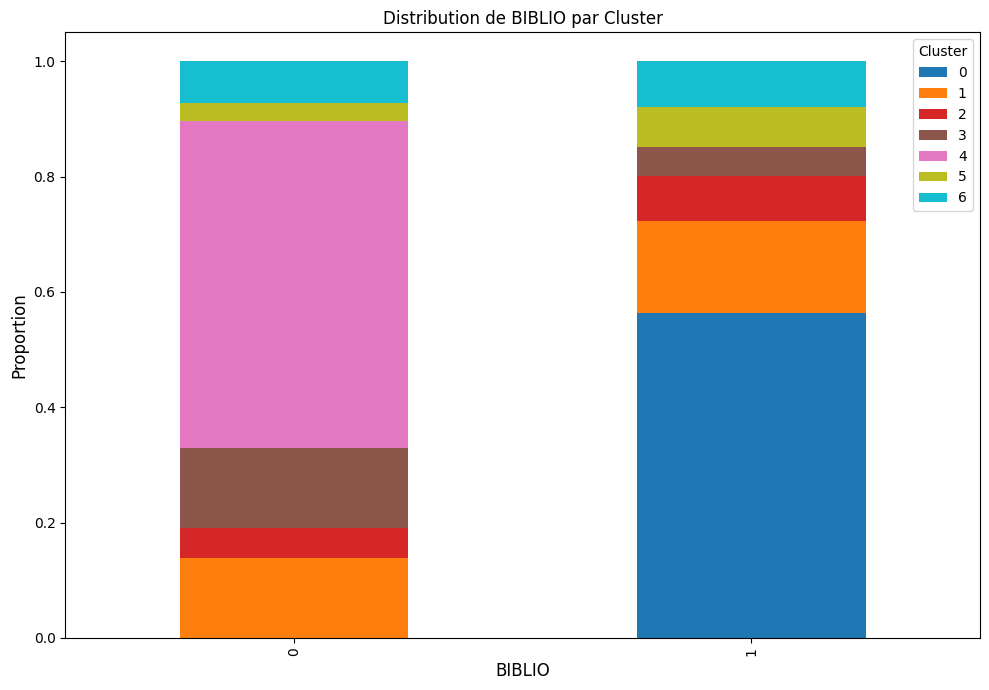

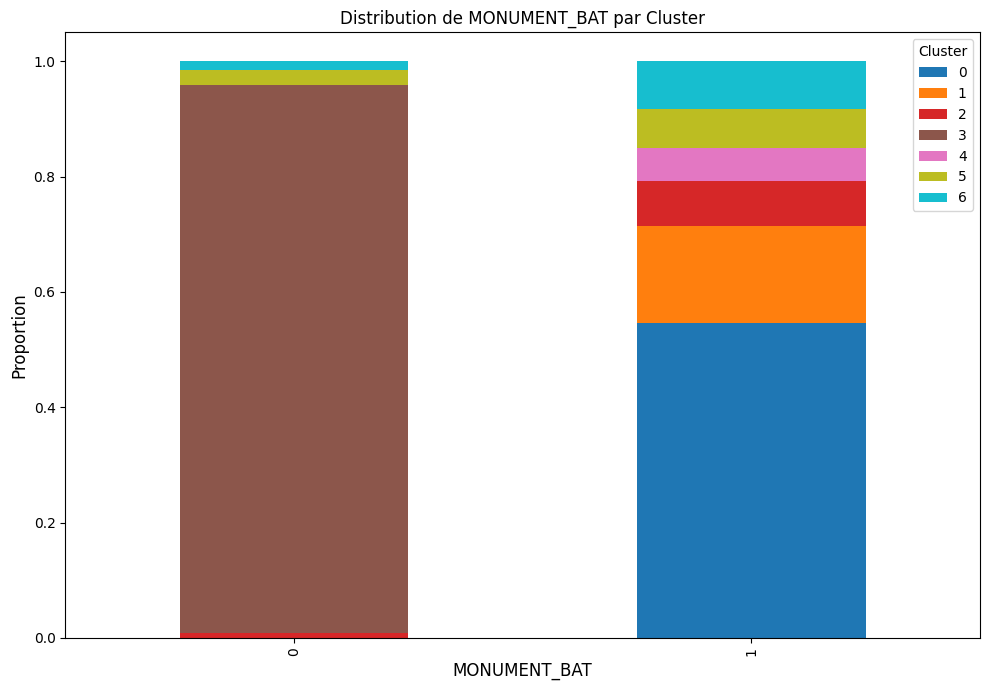

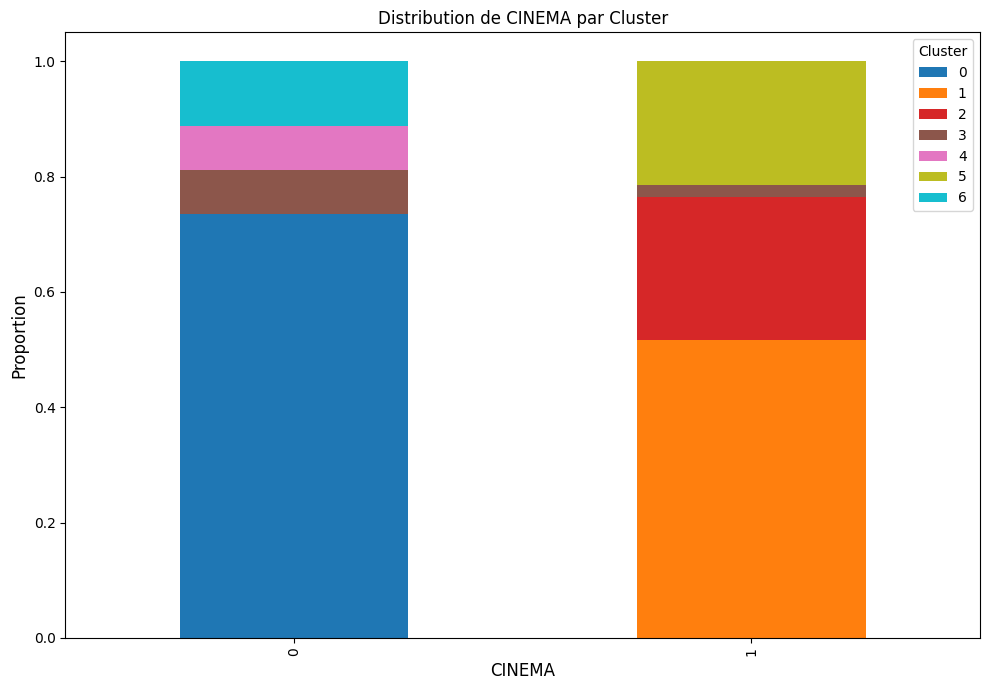

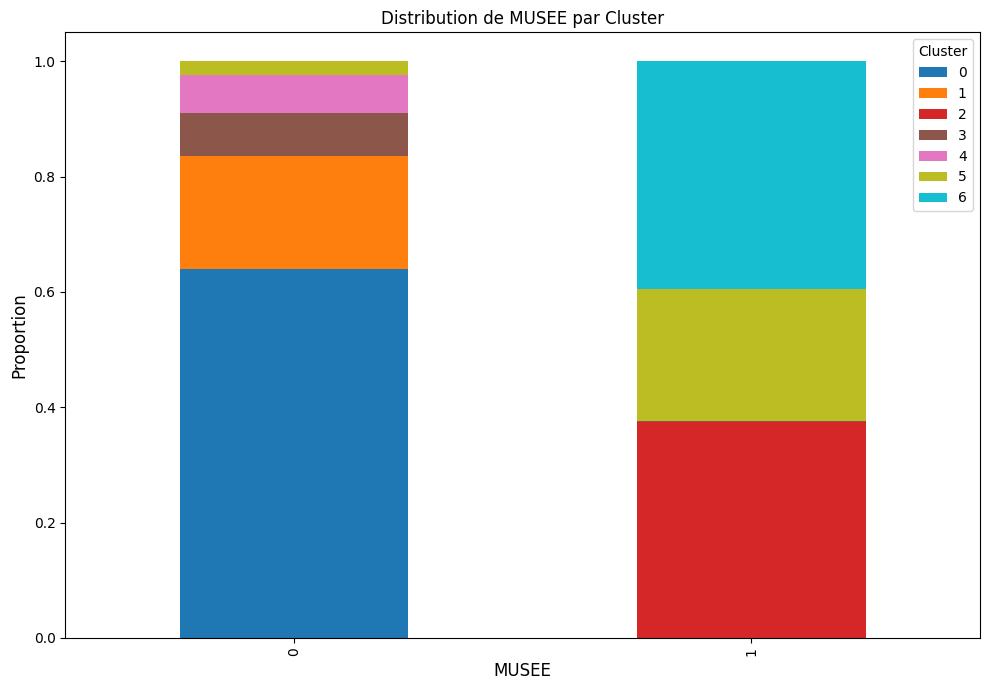

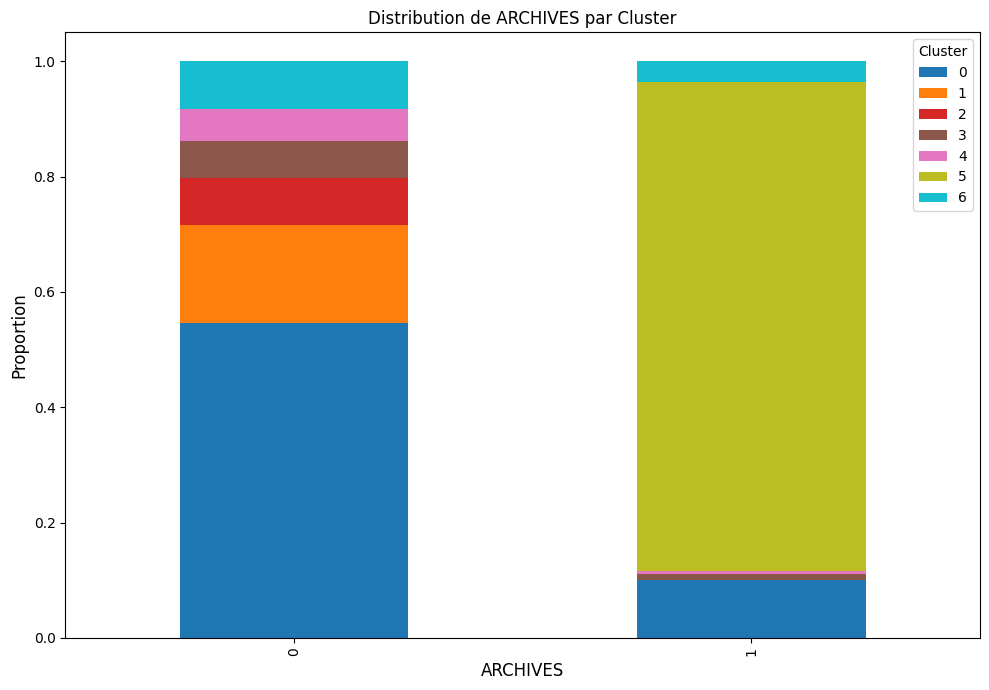

In [182]:
variables = ['BIBLIO', 'MONUMENT_BAT', 'CINEMA', 'MUSEE', 'ARCHIVES']

for variable in variables:
  data = df.groupby(['Cluster', variable]).size().reset_index(name='count')
  data['proportion'] = data['count'] / data.groupby(variable)['count'].transform('sum') #proportion
  pivot_data = data.pivot(index=variable, columns='Cluster', values='proportion')
  pivot_data.plot(kind='bar', stacked=True, figsize=(10, 7), colormap="tab10")

  plt.title(f"Distribution de {variable} par Cluster")
  plt.xlabel(variable, fontsize=12)
  plt.ylabel("Proportion", fontsize=12)
  plt.legend(title="Cluster")
  plt.tight_layout()
  plt.show()


cluster 0 : cine musee un peu ARCHIVES
cluster 1 : bibliotheque  
clusters 2 : bcp de monuments
clusters 3 : cinema
4 :  bat et biblio
5 : musée
6 : musée cinéma  

Trouver des caractéristiques qui regroupent les clusters :

In [165]:
nom = {
    0: "Seulement monuments et bibliothèques",
    1: "Beaucoup de cinémas",
    2: "Musée Cinémas",
    3: "Peu de monuments",
    4: "Peu de bibliothèques",
    5 : "Beaucoup d'archives",
    6 : "Musée"
}

df['Cluster_renommés'] = df['Cluster'].map(nom)
df

,CP,nomcom,NB_BIBLIO,NB_MONUMENT_BAT,NB_CINEMA,NB_MUSEE,NB_ARCHIVES,Cluster,Cluster_renommés
0,1000,BOURG-EN-BRESSE,1,1,1,1,1,5,Beaucoup d'archives
1,1000,SAINT-DENIS-LES-BOURG,1,1,1,1,1,5,Beaucoup d'archives
2,1090,LURCY,1,1,0,0,0,0,Seulement monuments et bibliothèques
3,1090,GUEREINS,1,1,0,0,0,0,Seulement monuments et bibliothèques
4,1090,MONTCEAUX,1,1,0,0,0,0,Seulement monuments et bibliothèques
...,...,...,...,...,...,...,...,...,...
31527,95840,BETHEMONT-LA-FORET,1,1,0,0,0,0,Seulement monuments et bibliothèques
31528,95850,JAGNY-SOUS-BOIS,0,1,0,0,0,4,Peu de bibliothèques
31529,95850,MAREIL-EN-FRANCE,0,1,0,0,0,4,Peu de bibliothèques
31530,95870,BEZONS,0,1,1,0,0,1,Beaucoup de cinémas


In [151]:
df.to_csv('/content/drive/MyDrive/PIP - G6/Donnees propres/clusters.csv', index=False)